In [40]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [41]:
scene = pd.read_csv('scene.csv')
scene

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,0.875782,0.901653,0.926227,0.721366,0.795826,0.867642,0.794125,0.899067,0.908963,0.895336,...,0.215147,0.279607,0.254413,0.134350,0,0,0,0,0,1
2403,0.657706,0.669877,0.692338,0.713920,0.727374,0.750354,0.684372,0.718770,0.719916,0.730645,...,0.217201,0.199491,0.048747,0.041638,0,0,0,0,0,1
2404,0.952281,0.944987,0.905556,0.836604,0.875916,0.957034,0.953938,0.967956,0.819636,0.707311,...,0.028002,0.031900,0.017547,0.019734,0,0,0,0,0,1
2405,0.883990,0.899004,0.901019,0.904298,0.846402,0.858145,0.851362,0.852472,0.876665,0.908187,...,0.239041,0.256158,0.226332,0.223070,0,0,0,0,0,1


In [42]:
scene[scene.duplicated()]

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
819,0.737393,0.743111,0.752081,0.750801,0.745001,0.734455,0.721951,0.587054,0.552219,0.540980,...,0.169156,0.174966,0.155058,0.180254,0,0,0,1,1,0
1180,0.856106,0.796168,0.795357,0.858880,0.857820,0.853516,0.845843,0.796534,0.573745,0.683174,...,0.228846,0.395300,0.650095,0.363560,0,0,0,0,0,1
1529,0.387676,0.619195,0.700544,0.692621,0.675467,0.639988,0.581236,0.250043,0.530131,0.646226,...,0.028823,0.012373,0.092781,0.453358,0,1,0,0,0,0
1816,0.822726,0.841596,0.854178,0.853351,0.832321,0.727812,0.673427,0.720047,0.694144,0.638666,...,0.090151,0.073411,0.092545,0.269895,0,0,0,1,0,0
1823,0.935084,0.949421,0.958368,0.951894,0.938494,0.918042,0.902955,0.955249,0.961176,0.969910,...,0.601508,0.527749,0.207364,0.130905,0,0,0,1,1,0
1824,0.594479,0.649259,0.694153,0.723562,0.743301,0.749857,0.749438,0.665857,0.714684,0.747500,...,0.038647,0.045248,0.042494,0.031769,0,0,0,1,1,0
2133,0.808853,0.835474,0.863497,0.881113,0.887467,0.883984,0.894570,0.877558,0.919845,0.933777,...,0.032374,0.085858,0.113335,0.198120,0,0,0,1,1,0


In [43]:
scene.drop_duplicates(inplace=True)
scene[scene.duplicated()]

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,Urban


In [44]:
scene.drop(['Beach','Sunset','FallFoliage','Field','Mountain'],axis=1,inplace=True)
scene

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr286,attr287,attr288,attr289,attr290,attr291,attr292,attr293,attr294,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.049615,0.068962,0.653879,0.354982,0.124074,0.157332,0.247298,0.014025,0.029709,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.160008,0.414088,0.361843,0.303399,0.176387,0.251454,0.137833,0.082672,0.036320,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.038082,0.079977,0.004901,0.003460,0.006049,0.017166,0.051125,0.112506,0.083924,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.016922,0.024174,0.036799,0.007694,0.009735,0.019267,0.031290,0.049780,0.090959,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.023177,0.129994,0.167709,0.226580,0.218534,0.198151,0.238796,0.164270,0.184290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,0.875782,0.901653,0.926227,0.721366,0.795826,0.867642,0.794125,0.899067,0.908963,0.895336,...,0.061081,0.121834,0.378950,0.366901,0.211351,0.215147,0.279607,0.254413,0.134350,1
2403,0.657706,0.669877,0.692338,0.713920,0.727374,0.750354,0.684372,0.718770,0.719916,0.730645,...,0.079166,0.034408,0.095084,0.025579,0.013329,0.217201,0.199491,0.048747,0.041638,1
2404,0.952281,0.944987,0.905556,0.836604,0.875916,0.957034,0.953938,0.967956,0.819636,0.707311,...,0.050678,0.020770,0.022791,0.033978,0.023563,0.028002,0.031900,0.017547,0.019734,1
2405,0.883990,0.899004,0.901019,0.904298,0.846402,0.858145,0.851362,0.852472,0.876665,0.908187,...,0.111811,0.148926,0.097985,0.361665,0.200352,0.239041,0.256158,0.226332,0.223070,1


In [45]:
def plot_confusion_matrix(y_test,y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm)
    cm = cm.rename(columns={0: 'Non-Urban',1:'Urban'}, index={0: 'Non-Urban',1:'Urban'})
    sns.heatmap(cm,annot=True,cmap='Blues', fmt='g');

In [46]:
def plot_learning_curve (estimator,X,y,cv,scoring ='accuracy',n_jobs=-1,train_size=np.linspace(0.01, 1.0, 50)):
    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=cv,
                                                        # Evaluation metric
                                                        scoring=scoring)
                                                    
                                                    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [47]:
def gridSearch(estimator, X_train,y_train,X_test,y_test,*args):
    score = {'model_name':[],'accuracy':[],'params': []}
    for i in args[0]:
        for z in args[1]:
            if (type(estimator).__name__ == 'SVC'):
                estimator.set_params(kernel=i,gamma='scale',C= z)
            elif (type(estimator).__name__ == 'RandomForestClassifier'):
                estimator.set_params(n_estimators= i, criterion= z)
            else:
                estimator.set_params(penalty = i , solver = z)
                
            estimator.fit(X_train,y_train.ravel())
            y_pred = estimator.predict(X_test)
            score['model_name'].append(type(estimator).__name__)
            score['accuracy'].append(metrics.accuracy_score(y_test,y_pred))
            score['params'].append((i,z))

    return pd.DataFrame(score)

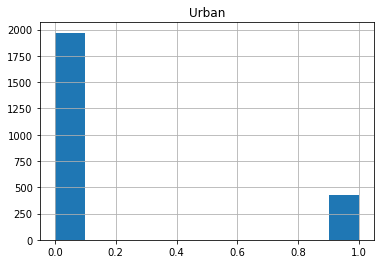

In [48]:
scene.hist('Urban');

In [49]:
no_of_Urban= scene.Urban.value_counts()

In [50]:
per_of_Urban = (scene.Urban.value_counts()[1]/scene.Urban.count())* 100
print(f'The percentage of Urban in dataset ' + str(per_of_Urban) + ' %')
per_of_NonUrban = (scene.Urban.value_counts()[0]/scene.Urban.count())* 100
print(f'The percentage of Non Urban in dataset '+str(per_of_NonUrban) +' %')

The percentage of Urban in dataset 17.916666666666668 %
The percentage of Non Urban in dataset 82.08333333333333 %


In [51]:
from  imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(scene.iloc[:,:-1], scene.iloc[:,-1])

In [52]:
scene = pd.DataFrame(X)
scene['Urban'] = y
scene

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr286,attr287,attr288,attr289,attr290,attr291,attr292,attr293,attr294,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.049615,0.068962,0.653879,0.354982,0.124074,0.157332,0.247298,0.014025,0.029709,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.160008,0.414088,0.361843,0.303399,0.176387,0.251454,0.137833,0.082672,0.036320,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.038082,0.079977,0.004901,0.003460,0.006049,0.017166,0.051125,0.112506,0.083924,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.016922,0.024174,0.036799,0.007694,0.009735,0.019267,0.031290,0.049780,0.090959,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.023177,0.129994,0.167709,0.226580,0.218534,0.198151,0.238796,0.164270,0.184290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,0.601942,0.604272,0.611324,0.631478,0.638875,0.635036,0.634691,0.655578,0.644464,0.689537,...,0.022532,0.020312,0.015264,0.017399,0.011614,0.007481,0.019872,0.031213,0.024643,1
3936,0.768321,0.770190,0.769478,0.763833,0.768388,0.766071,0.762465,0.796090,0.797607,0.790655,...,0.029371,0.031159,0.324491,0.180672,0.055943,0.033573,0.027542,0.040604,0.038999,1
3937,0.640273,0.641020,0.644614,0.639565,0.639508,0.632353,0.624252,0.698401,0.699703,0.710788,...,0.122699,0.719966,0.128214,0.033510,0.042008,0.031038,0.013351,0.011675,0.834020,1
3938,0.856568,0.907994,0.912400,0.897637,0.907189,0.768742,0.350334,0.904251,0.651788,0.437580,...,0.180386,0.032592,0.088169,0.019436,0.023991,0.055391,0.040106,0.099148,0.049236,1


In [53]:
df_corr = scene.corr().abs()
df_corr = df_corr['Urban']
df_corr =pd.DataFrame(df_corr.values,scene.columns).reset_index()
df_corr.columns = ['Features','Correlation']
df_corr = df_corr.sort_values(by = 'Correlation',ascending = False)[1:].head(30)
df_corr

,Features,Correlation
243,attr244,0.421093
239,attr240,0.413309
241,attr242,0.411762
242,attr243,0.409107
233,attr234,0.407491
240,attr241,0.407297
231,attr232,0.406159
232,attr233,0.405813
225,attr226,0.404336
238,attr239,0.403948


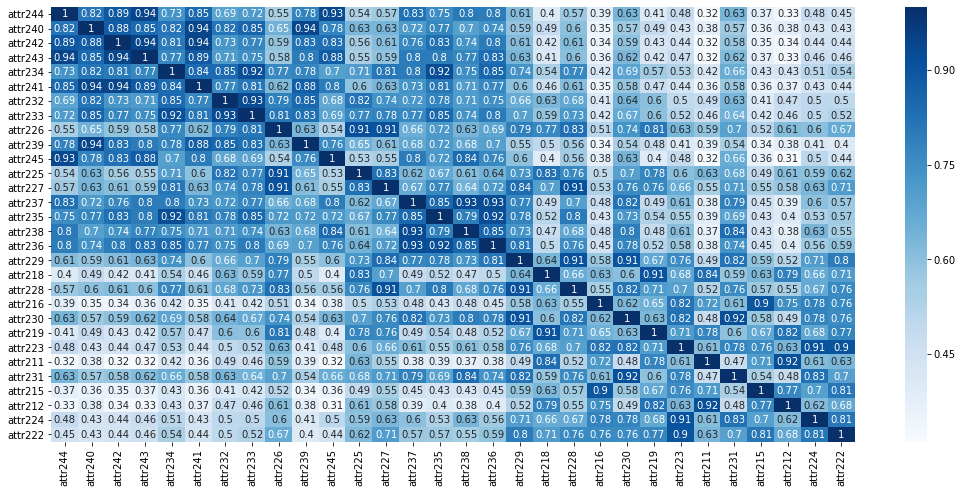

In [54]:
import seaborn as sns
selected_features = df_corr['Features'].values
df_corr2 = scene[selected_features].corr().abs()
plt.subplots(1,1,figsize=(18,8))
sns.heatmap(df_corr2,annot=True,cmap='Blues')
plt.show()

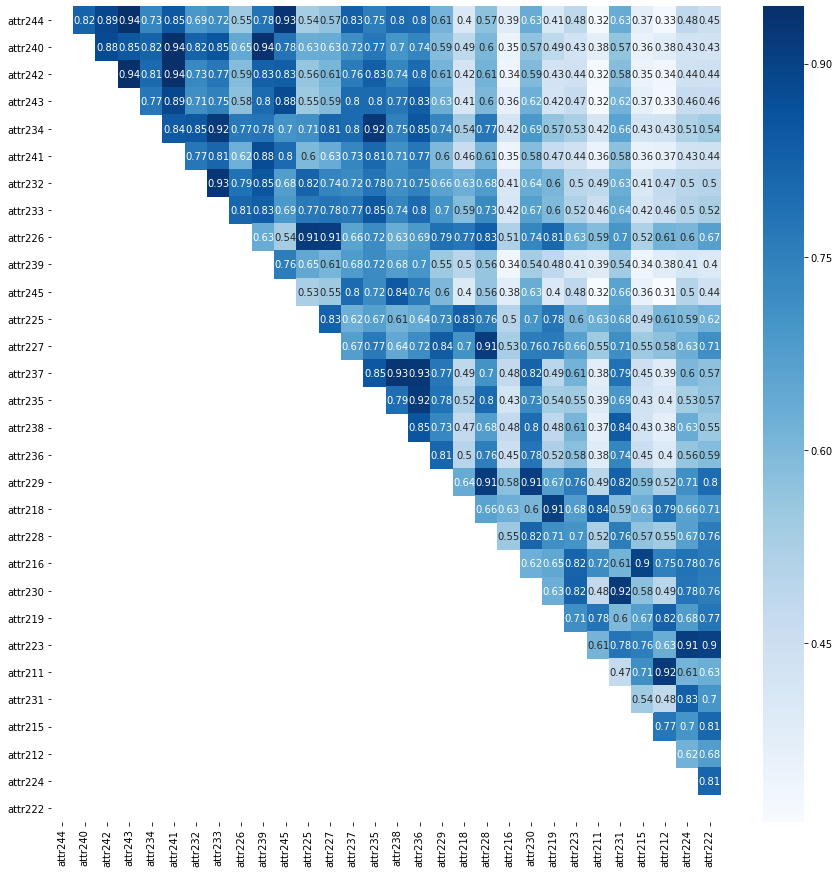

In [55]:
upper_tri = df_corr2.where(np.triu(np.ones(df_corr2.shape), k=1).astype(np.bool))
fig = plt.figure(figsize=(15,15))
sns.heatmap(upper_tri,annot = True,cmap='Blues')
plt.show()

In [56]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop

['attr243',
 'attr241',
 'attr233',
 'attr239',
 'attr245',
 'attr225',
 'attr227',
 'attr235',
 'attr238',
 'attr236',
 'attr228',
 'attr230',
 'attr219',
 'attr231',
 'attr212',
 'attr224',
 'attr222']

In [57]:
selected_features = [ x for x in selected_features if x not in to_drop]
selected_features.append('Urban')
Df2 = scene[selected_features]
# Df2 = scene.iloc[:,[13,21,24,30,35,42,48,79,85,119,136,201, 216,225,238,-1]]
# Df2 = scene.iloc[:,[14,26,47,65,72,78,83,88,96,107,138,142,202,225,243,-1]]
Df2

,attr244,attr240,attr242,attr234,attr232,attr226,attr237,attr229,attr218,attr216,attr223,attr211,attr215,Urban
0,0.588030,0.460268,0.562813,0.603675,0.331432,0.499351,0.596149,0.546453,0.178129,0.380569,0.512927,0.175233,0.391528,0
1,0.638408,0.500693,0.558564,0.568729,0.600465,0.587281,0.642803,0.536769,0.409800,0.530160,0.573269,0.437265,0.526537,1
2,0.726349,0.628198,0.627427,0.664643,0.551206,0.389750,0.727154,0.726449,0.480978,0.344326,0.624508,0.342984,0.343230,0
3,0.625089,0.560029,0.662518,0.525374,0.330571,0.326624,0.641427,0.685096,0.362140,0.629741,0.682088,0.496332,0.655193,0
4,0.830940,0.753892,0.736883,0.770934,0.643172,0.642792,0.608886,0.623490,0.598542,0.125358,0.393485,0.273081,0.141181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,0.422038,0.544954,0.551461,0.514745,0.559269,0.510991,0.511967,0.503664,0.557402,0.193106,0.249516,0.237322,0.320497,1
3936,0.518171,0.538188,0.533432,0.491001,0.487014,0.492400,0.521484,0.502413,0.431464,0.415025,0.472315,0.359208,0.383681,1
3937,0.407250,0.383762,0.388469,0.358581,0.405828,0.454731,0.429496,0.430262,0.217533,0.044407,0.258012,0.049345,0.167465,1
3938,0.421641,0.417173,0.559212,0.429244,0.457650,0.431802,0.405739,0.483055,0.394171,0.393006,0.378302,0.350458,0.475275,1


In [58]:
X = Df2.iloc[:, :-1].values
y = Df2.iloc[:, -1:].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [60]:
# Fitting SVM to the Training set
from sklearn.linear_model import LogisticRegression
solver= ['newton-cg','lbfgs','liblinear', 'sag', 'saga']
penalty =['l2']
scoresDf = gridSearch(LogisticRegression(random_state=0),X_train,y_train,X_test,y_test,penalty,solver)

In [61]:
scoresDf.sort_values(by='accuracy',ascending=False)

,model_name,accuracy,params
0,LogisticRegression,0.748223,"(l2, newton-cg)"
1,LogisticRegression,0.748223,"(l2, lbfgs)"
2,LogisticRegression,0.748223,"(l2, liblinear)"
3,LogisticRegression,0.748223,"(l2, sag)"
4,LogisticRegression,0.748223,"(l2, saga)"


In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',penalty='l2',random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7482233502538072


C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mido_\Anaconda3\lib\site-packages\skle

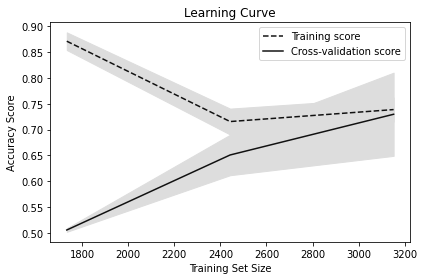

In [63]:
plot_learning_curve(classifier,X,y.ravel(),5)

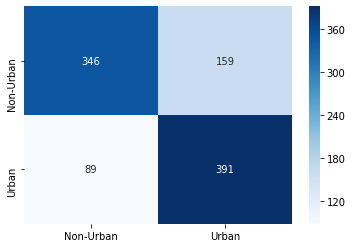

In [64]:
# Making the Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

In [65]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
kernel =  ['rbf','linear','sigmoid']
C = [1,10,20]
scoresDf = gridSearch(SVC(random_state = 0),X_train,y_train,X_test,y_test,kernel,C)

In [66]:
scoresDf.sort_values(by='accuracy',ascending=False) 

,model_name,accuracy,params
2,SVC,0.862944,"(rbf, 20)"
1,SVC,0.854822,"(rbf, 10)"
0,SVC,0.838579,"(rbf, 1)"
4,SVC,0.757360,"(linear, 10)"
5,SVC,0.757360,"(linear, 20)"
3,SVC,0.752284,"(linear, 1)"
6,SVC,0.309645,"(sigmoid, 1)"
7,SVC,0.278173,"(sigmoid, 10)"
8,SVC,0.278173,"(sigmoid, 20)"


In [67]:
classifier = SVC(kernel='rbf',C=20,gamma='scale',random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8629441624365483

C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 551, in _validate_targets
    " class" % len(cls))
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (

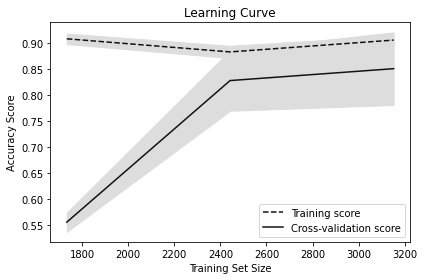

In [68]:
plot_learning_curve(classifier,X,y.ravel(),5)

In [70]:
# Fitting SVM to the Training set
from sklearn.ensemble import RandomForestClassifier
n_estimator = [5,10,20,30,40,50]
criterion = ['gini','entropy']
scoresDf3 = gridSearch(RandomForestClassifier(random_state=0),X_train,y_train,X_test,y_test,n_estimator,criterion)

In [71]:
scoresDf3.sort_values(by = 'accuracy',ascending=False)

,model_name,accuracy,params
8,RandomForestClassifier,0.883249,"(40, gini)"
10,RandomForestClassifier,0.883249,"(50, gini)"
11,RandomForestClassifier,0.882234,"(50, entropy)"
4,RandomForestClassifier,0.881218,"(20, gini)"
6,RandomForestClassifier,0.881218,"(30, gini)"
9,RandomForestClassifier,0.875127,"(40, entropy)"
7,RandomForestClassifier,0.874112,"(30, entropy)"
5,RandomForestClassifier,0.873096,"(20, entropy)"
3,RandomForestClassifier,0.860914,"(10, entropy)"
1,RandomForestClassifier,0.855838,"(5, entropy)"


In [73]:
classifier = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

C:\Users\mido_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy Score:
0.8822335025380711


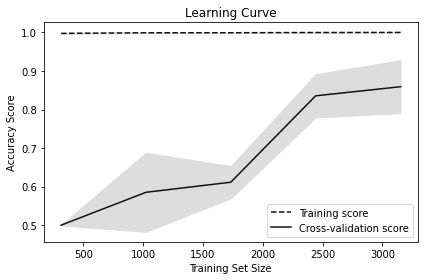

In [74]:
plot_learning_curve(classifier,X,y.ravel(),5)

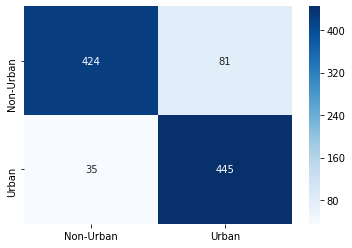

In [75]:
# Making the Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

In [76]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

X = scene.iloc[:,:-1].values
y= scene.iloc[:,-1].values

sfs1 = SFS(RandomForestClassifier(n_estimators=10,random_state=0), 
           k_features=15, 
           forward=True, 
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y)
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:   21.4s finished

[2020-12-11 17:22:17] Features: 1/15 -- score: 0.9616751269035533[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 293 out of 293 | elapsed:   19.0s finished

[2020-12-11 17:22:36] Features: 2/15 -- score: 0.9865482233502538[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 292 out of 292 | elapsed:   18.8s finished

[2020-12-11 17:22:55] Features: 3/15 -- score: 0.9918781725888325[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

{1: {'feature_idx': (225,),
  'cv_scores': array([0.96167513]),
  'avg_score': 0.9616751269035533,
  'feature_names': ('225',)},
 2: {'feature_idx': (107, 225),
  'cv_scores': array([0.98654822]),
  'avg_score': 0.9865482233502538,
  'feature_names': ('107', '225')},
 3: {'feature_idx': (107, 189, 225),
  'cv_scores': array([0.99187817]),
  'avg_score': 0.9918781725888325,
  'feature_names': ('107', '189', '225')},
 4: {'feature_idx': (107, 120, 189, 225),
  'cv_scores': array([0.99314721]),
  'avg_score': 0.9931472081218274,
  'feature_names': ('107', '120', '189', '225')},
 5: {'feature_idx': (107, 120, 189, 212, 225),
  'cv_scores': array([0.99593909]),
  'avg_score': 0.9959390862944163,
  'feature_names': ('107', '120', '189', '212', '225')},
 6: {'feature_idx': (107, 120, 189, 212, 225, 265),
  'cv_scores': array([0.99670051]),
  'avg_score': 0.9967005076142132,
  'feature_names': ('107', '120', '189', '212', '225', '265')},
 7: {'feature_idx': (107, 120, 189, 208, 212, 225, 265),

In [58]:
X = Df2.iloc[:, :-1].values
y = Df2.iloc[:, -1:].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [60]:
# Fitting SVM to the Training set
from sklearn.linear_model import LogisticRegression
solver= ['newton-cg','lbfgs','liblinear', 'sag', 'saga']
penalty =['l2']
scoresDf = gridSearch(LogisticRegression(random_state=0),X_train,y_train,X_test,y_test,penalty,solver)

In [61]:
scoresDf.sort_values(by='accuracy',ascending=False)

,model_name,accuracy,params
0,LogisticRegression,0.748223,"(l2, newton-cg)"
1,LogisticRegression,0.748223,"(l2, lbfgs)"
2,LogisticRegression,0.748223,"(l2, liblinear)"
3,LogisticRegression,0.748223,"(l2, sag)"
4,LogisticRegression,0.748223,"(l2, saga)"


In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',penalty='l2',random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7482233502538072


C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mido_\Anaconda3\lib\site-packages\skle

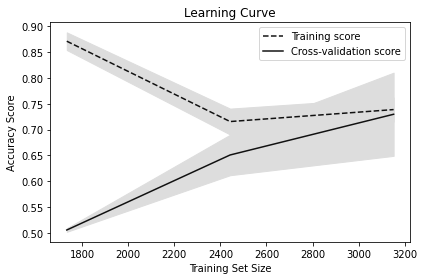

In [63]:
plot_learning_curve(classifier,X,y.ravel(),5)

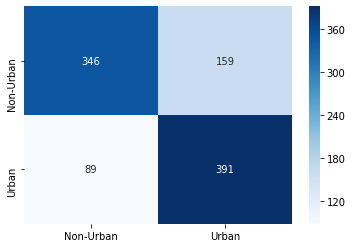

In [64]:
# Making the Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

In [65]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
kernel =  ['rbf','linear','sigmoid']
C = [1,10,20]
scoresDf = gridSearch(SVC(random_state = 0),X_train,y_train,X_test,y_test,kernel,C)

In [66]:
scoresDf.sort_values(by='accuracy',ascending=False) 

,model_name,accuracy,params
2,SVC,0.862944,"(rbf, 20)"
1,SVC,0.854822,"(rbf, 10)"
0,SVC,0.838579,"(rbf, 1)"
4,SVC,0.757360,"(linear, 10)"
5,SVC,0.757360,"(linear, 20)"
3,SVC,0.752284,"(linear, 1)"
6,SVC,0.309645,"(sigmoid, 1)"
7,SVC,0.278173,"(sigmoid, 10)"
8,SVC,0.278173,"(sigmoid, 20)"


In [67]:
classifier = SVC(kernel='rbf',C=20,gamma='scale',random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8629441624365483

C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 551, in _validate_targets
    " class" % len(cls))
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
C:\Users\mido_\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (

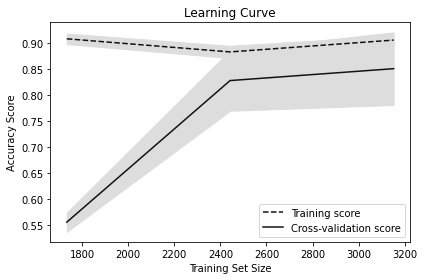

In [68]:
plot_learning_curve(classifier,X,y.ravel(),5)

In [70]:
# Fitting SVM to the Training set
from sklearn.ensemble import RandomForestClassifier
n_estimator = [5,10,20,30,40,50]
criterion = ['gini','entropy']
scoresDf3 = gridSearch(RandomForestClassifier(random_state=0),X_train,y_train,X_test,y_test,n_estimator,criterion)

In [71]:
scoresDf3.sort_values(by = 'accuracy',ascending=False)

,model_name,accuracy,params
8,RandomForestClassifier,0.883249,"(40, gini)"
10,RandomForestClassifier,0.883249,"(50, gini)"
11,RandomForestClassifier,0.882234,"(50, entropy)"
4,RandomForestClassifier,0.881218,"(20, gini)"
6,RandomForestClassifier,0.881218,"(30, gini)"
9,RandomForestClassifier,0.875127,"(40, entropy)"
7,RandomForestClassifier,0.874112,"(30, entropy)"
5,RandomForestClassifier,0.873096,"(20, entropy)"
3,RandomForestClassifier,0.860914,"(10, entropy)"
1,RandomForestClassifier,0.855838,"(5, entropy)"


In [73]:
classifier = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

C:\Users\mido_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy Score:
0.8822335025380711


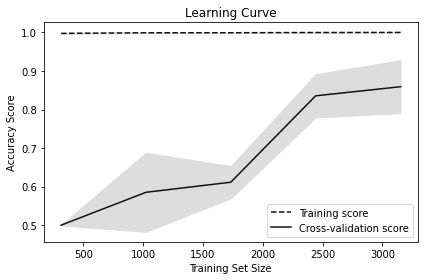

In [74]:
plot_learning_curve(classifier,X,y.ravel(),5)

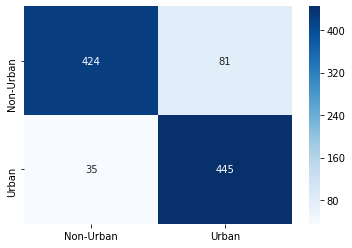

In [75]:
# Making the Confusion Matrix
plot_confusion_matrix(y_test, y_pred)